In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [2]:
df= pd.read_csv("C:/Users/Aruan/Downloads/dataset_PD.csv")

In [3]:
df.head()

,loan_id,Age,Education,MaritalStatus,HasDependents,EmploymentType,MonthsEmployed,Income,CreditScore,NumCreditLines,HasMortgage,DTIRatio,LoanPurpose,LoanAmount,LoanTerm,InterestRate,HasCoSigner,Default
0,0,25,PhD,Married,Yes,Self-employed,84,119007,790,3,No,0.73,Business,93703,60,12.48,No,0
1,1,40,Master's,Divorced,Yes,Self-employed,50,63276,420,1,Yes,0.14,Auto,240094,24,4.54,Yes,0
2,2,38,PhD,Single,Yes,Self-employed,45,45264,563,4,Yes,0.54,Education,179845,36,22.49,Yes,0
3,3,51,PhD,Divorced,Yes,Unemployed,60,88939,617,4,Yes,0.51,Auto,212685,24,11.82,Yes,0
4,4,47,PhD,Single,No,Self-employed,50,120066,401,3,Yes,0.34,Education,24352,60,10.16,No,0


In [4]:
df.shape

(200000, 18)

In [5]:
df.isnull().sum()

loan_id           0
Age               0
Education         0
MaritalStatus     0
HasDependents     0
EmploymentType    0
MonthsEmployed    0
Income            0
CreditScore       0
NumCreditLines    0
HasMortgage       0
DTIRatio          0
LoanPurpose       0
LoanAmount        0
LoanTerm          0
InterestRate      0
HasCoSigner       0
Default           0
dtype: int64

In [6]:
df.describe()

,loan_id,Age,MonthsEmployed,Income,CreditScore,NumCreditLines,DTIRatio,LoanAmount,LoanTerm,InterestRate,Default
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,99999.500000,43.493405,59.531075,82493.357275,574.44287,2.503575,0.500165,127550.347825,36.065160,13.505050,0.115980
std,57735.171256,14.992909,34.647848,38958.775036,158.79645,1.117637,0.230962,70836.304193,16.953586,6.637093,0.320202
min,0.000000,18.000000,0.000000,15000.000000,300.00000,1.000000,0.100000,5000.000000,12.000000,2.000000,0.000000
25%,49999.750000,31.000000,30.000000,48868.750000,437.00000,2.000000,0.300000,66107.000000,24.000000,7.790000,0.000000
50%,99999.500000,43.000000,59.500000,82463.000000,574.00000,3.000000,0.500000,127517.000000,36.000000,13.470000,0.000000
75%,149999.250000,56.000000,90.000000,116199.000000,712.00000,4.000000,0.700000,188960.750000,48.000000,19.260000,0.000000
max,199999.000000,69.000000,119.000000,149999.000000,849.00000,4.000000,0.900000,249999.000000,60.000000,25.000000,1.000000


In [7]:
df_encoded = pd.get_dummies(
    df,
    columns=['MaritalStatus','LoanPurpose', 'Education', 'EmploymentType'],
    drop_first=True,
    dummy_na=False,
    prefix_sep="__"
)
bool_cols = df_encoded.select_dtypes(include=["bool"]).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype("int8")
df_encoded


,loan_id,Age,HasDependents,MonthsEmployed,Income,CreditScore,NumCreditLines,HasMortgage,DTIRatio,LoanAmount,...,LoanPurpose__Business,LoanPurpose__Education,LoanPurpose__Home,LoanPurpose__Other,Education__High School,Education__Master's,Education__PhD,EmploymentType__Part-time,EmploymentType__Self-employed,EmploymentType__Unemployed
0,0,25,Yes,84,119007,790,3,No,0.73,93703,...,1,0,0,0,0,0,1,0,1,0
1,1,40,Yes,50,63276,420,1,Yes,0.14,240094,...,0,0,0,0,0,1,0,0,1,0
2,2,38,Yes,45,45264,563,4,Yes,0.54,179845,...,0,1,0,0,0,0,1,0,1,0
3,3,51,Yes,60,88939,617,4,Yes,0.51,212685,...,0,0,0,0,0,0,1,0,0,1
4,4,47,No,50,120066,401,3,Yes,0.34,24352,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,23,Yes,19,139919,305,3,No,0.53,52032,...,1,0,0,0,0,1,0,0,0,1
199996,199996,64,Yes,16,75895,370,3,Yes,0.55,35686,...,0,0,0,1,0,0,0,0,0,1
199997,199997,35,Yes,80,102430,800,4,No,0.64,44276,...,0,0,1,0,1,0,0,0,1,0
199998,199998,18,No,86,80510,517,4,Yes,0.23,149623,...,0,0,0,1,1,0,0,0,1,0


In [8]:
import seaborn as sns

In [9]:
correlation =df.select_dtypes(include='number').corr()

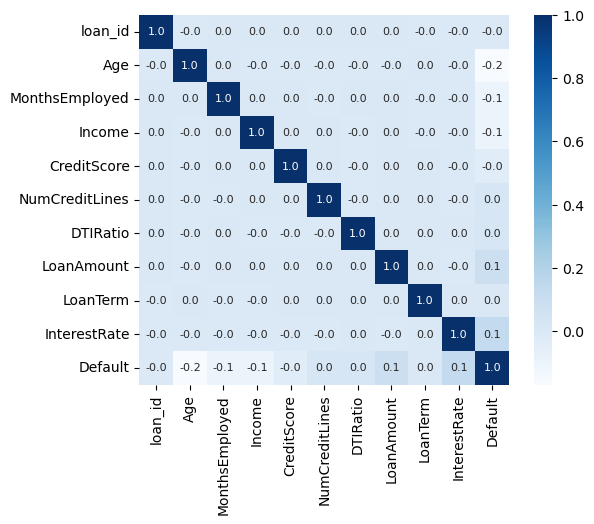

In [10]:
import matplotlib.pyplot as plt
sns.heatmap(correlation, 
            cbar=True, 
            square=True, 
            fmt='.1f',         
            annot=True, 
            annot_kws={'size': 8}, 
            cmap='Blues')
plt.show()

In [11]:
sns.set(style="whitegrid")

Target rate:
Default
0    0.88402
1    0.11598
Name: proportion, dtype: float64


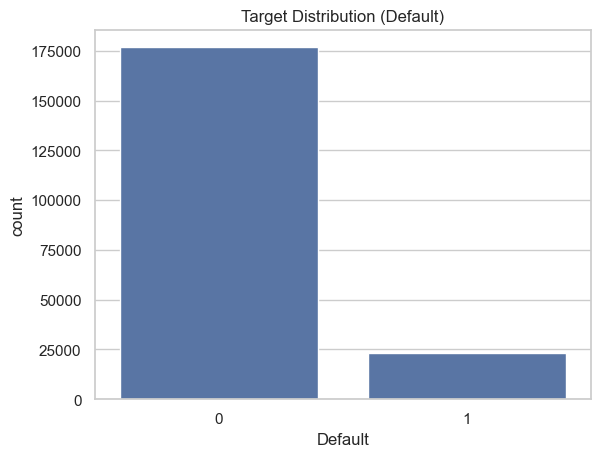

In [12]:
target_rate = df["Default"].value_counts(normalize=True)

print("Target rate:")
print(target_rate)

sns.countplot(data=df, x="Default")
plt.title("Target Distribution (Default)")
plt.show()


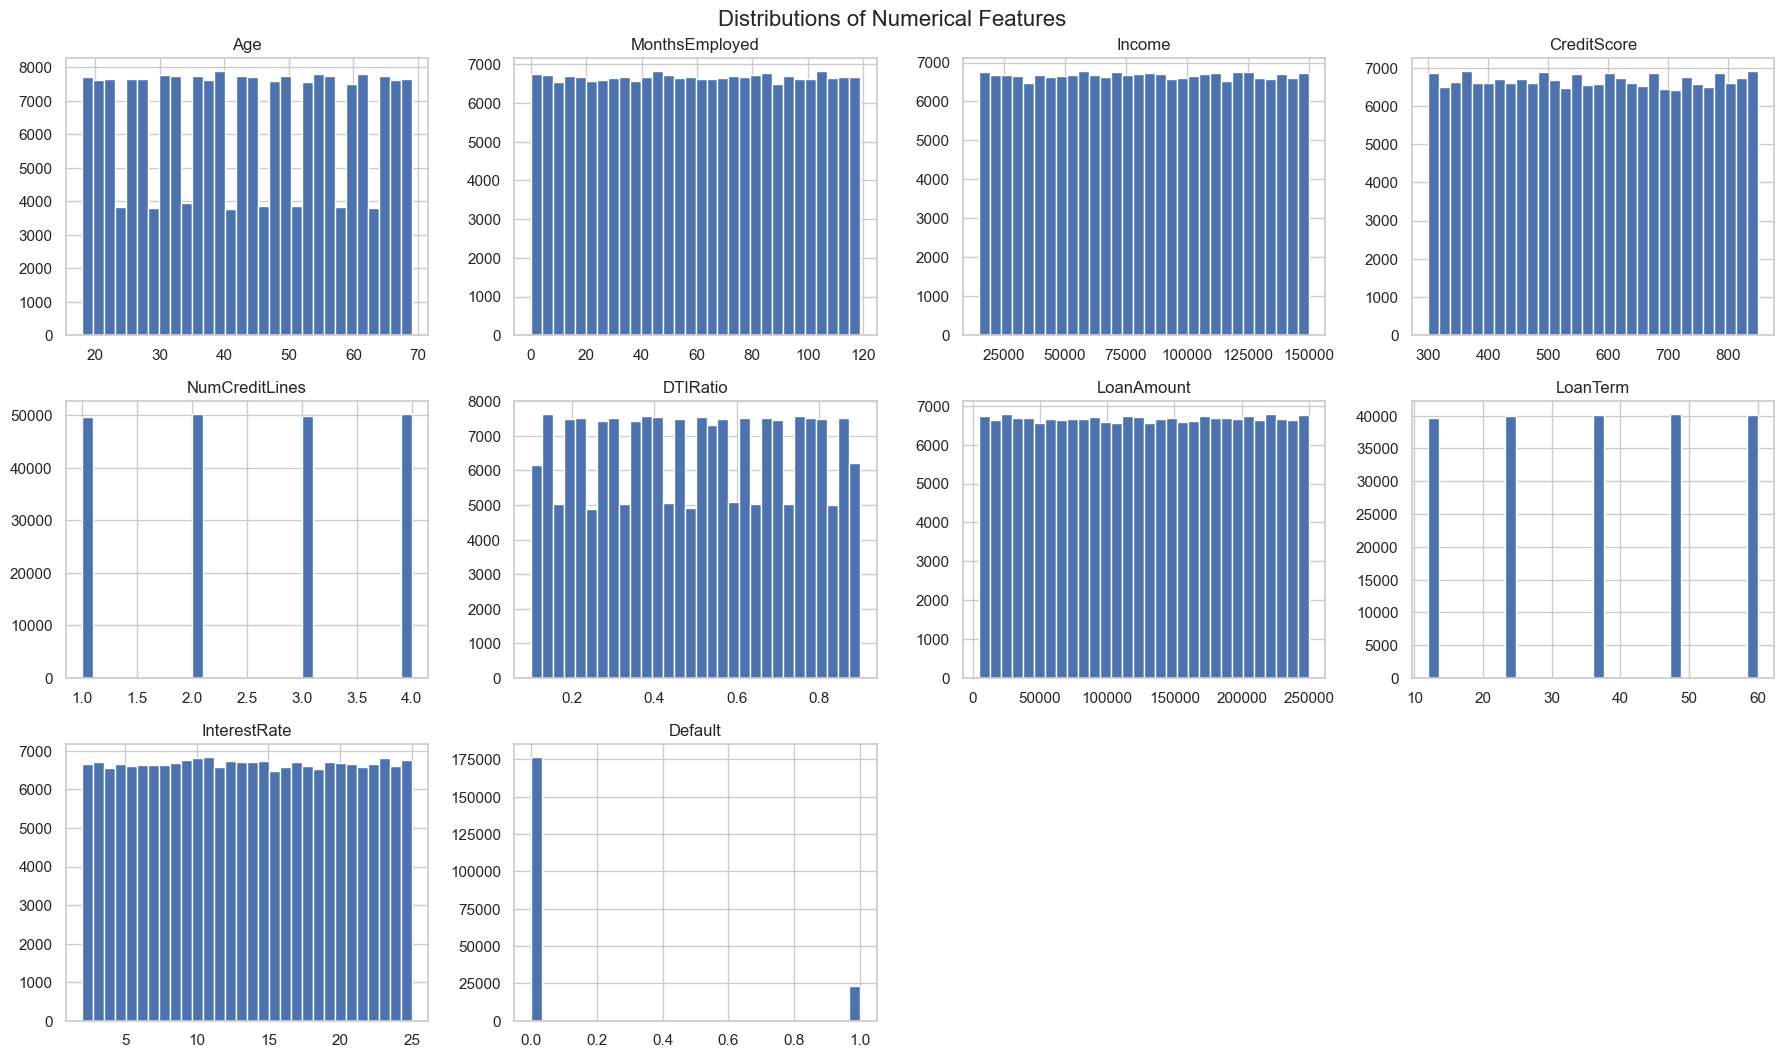

In [13]:
num_cols = df.select_dtypes(include=np.number).columns.drop("loan_id")

df[num_cols].hist(
    bins=30,
    figsize=(18, 14),
    layout=(4, 4)
)

plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


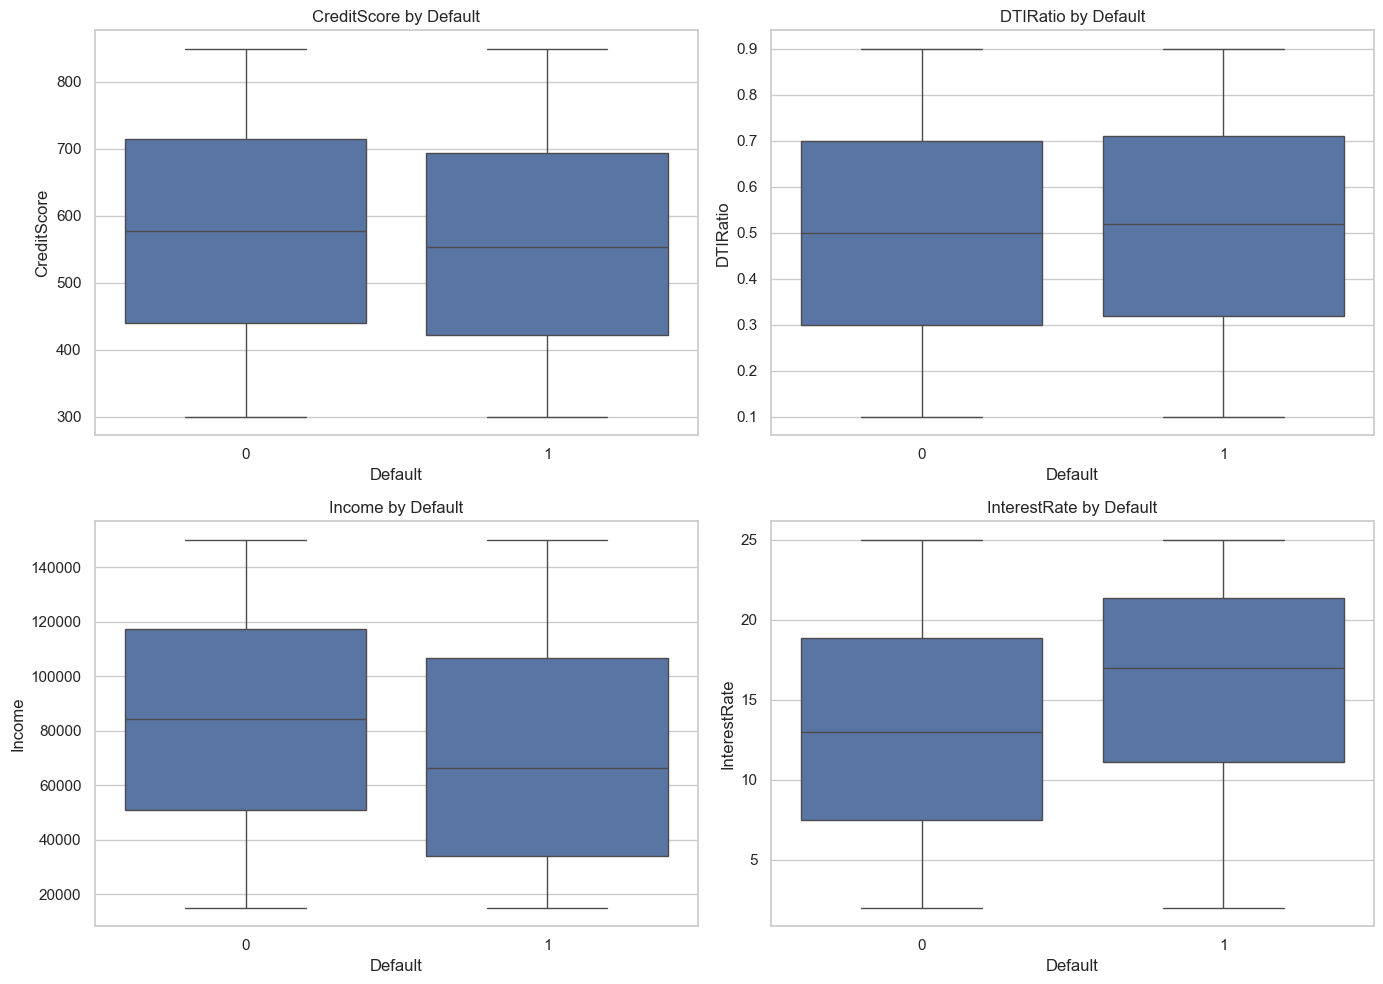

In [14]:
important_num = [
    "CreditScore",
    "DTIRatio",
    "Income",
    "InterestRate"
]

plt.figure(figsize=(14, 10))

for i, col in enumerate(important_num, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="Default", y=col)
    plt.title(f"{col} by Default")

plt.tight_layout()
plt.show()


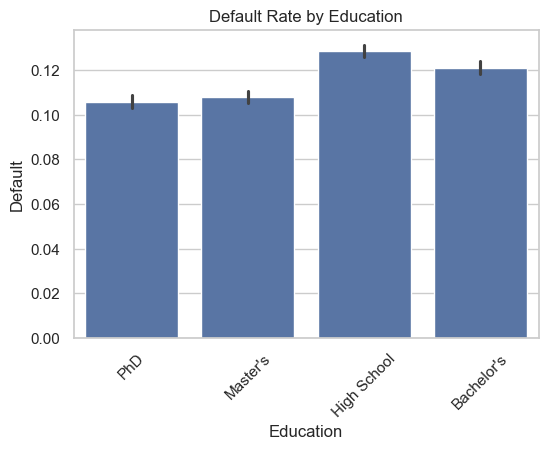

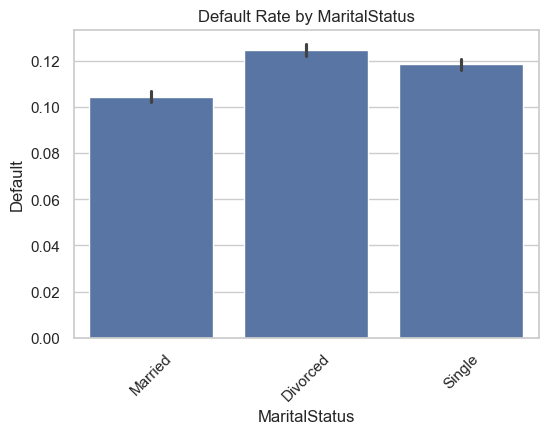

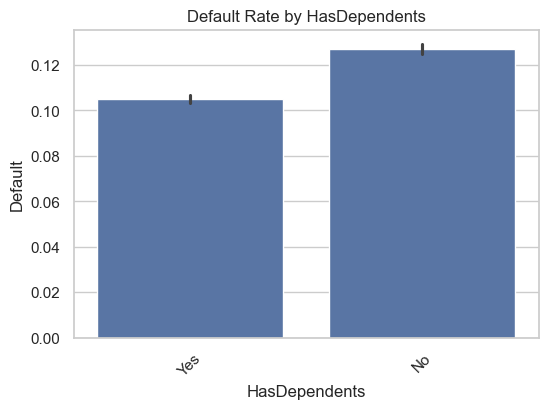

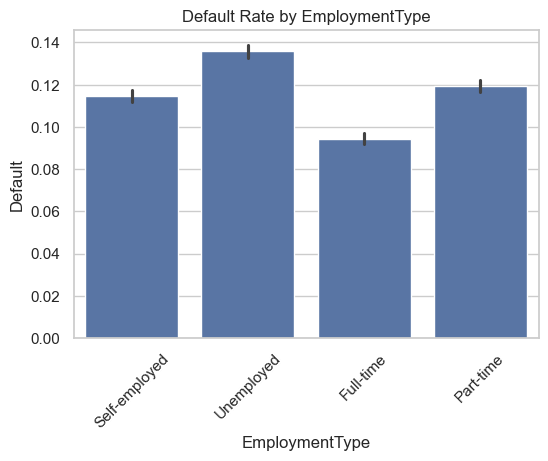

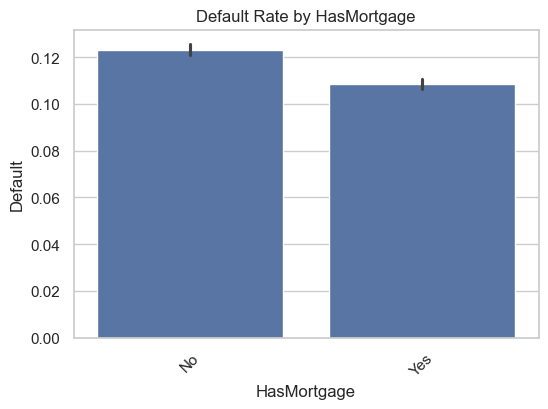

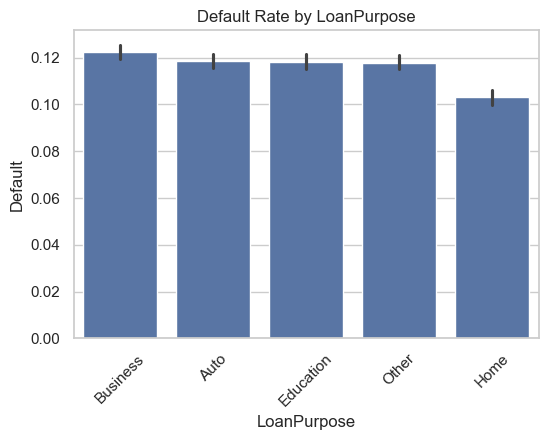

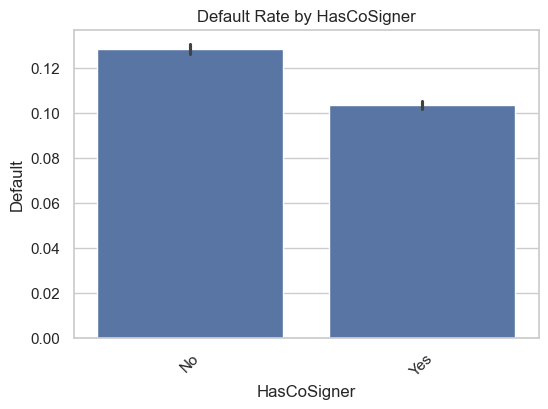

In [15]:
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(
        data=df,
        x=col,
        y="Default",
        estimator=np.mean
    )
    plt.xticks(rotation=45)
    plt.title(f"Default Rate by {col}")
    plt.show()


In [16]:
from scipy.stats import binomtest

def binomial_tests_for_feature(df, feature, target="Default"):
    overall_p = df[target].mean()
    results = []

    for category in df[feature].dropna().unique():
        group = df[df[feature] == category][target]
        n = len(group)
        k = int(group.sum())

        if n < 30:
            continue  # слишком маленькая группа

        test = binomtest(k=k, n=n, p=overall_p, alternative="two-sided")

        results.append({
            "feature": feature,
            "category": category,
            "n": n,
            "defaults": k,
            "group_default_rate": k / n,
            "overall_default_rate": overall_p,
            "p_value": test.pvalue
        })

    return pd.DataFrame(results)


In [17]:
cat_cols = [
    "Education",
    "MaritalStatus",
    "HasDependents",
    "EmploymentType",
    "HasMortgage",
    "LoanPurpose",
    "HasCoSigner"
]

all_results = []

for col in cat_cols:
    res = binomial_tests_for_feature(df, col)
    all_results.append(res)

binom_df = pd.concat(all_results).sort_values("p_value")
binom_df


,feature,category,n,defaults,group_default_rate,overall_default_rate,p_value
2,EmploymentType,Full-time,49904,4711,0.094401,0.11598,4.171475e-54
1,EmploymentType,Unemployed,50046,6797,0.135815,0.11598,8.785864e-42
1,HasCoSigner,Yes,99866,10325,0.103389,0.11598,1.570086e-36
0,HasCoSigner,No,100134,12871,0.128538,0.11598,2.254719e-34
0,HasDependents,Yes,100010,10493,0.104920,0.11598,1.703657e-28
1,HasDependents,No,99990,12703,0.127043,0.11598,4.180865e-27
0,MaritalStatus,Married,66734,6975,0.104519,0.11598,6.767340e-21
2,Education,High School,50170,6447,0.128503,0.11598,5.989705e-18
4,LoanPurpose,Home,40134,4132,0.102955,0.11598,1.230976e-16
1,HasMortgage,Yes,99718,10827,0.108576,0.11598,1.789028e-13


In [18]:
def kuiper_statistic(x):
    """
    Compute Kuiper statistic for uniform[0,1]
    """
    x = np.sort(x)
    n = len(x)

    cdf = np.arange(1, n + 1) / n

    d_plus = np.max(cdf - x)
    d_minus = np.max(x - (cdf - 1 / n))

    return d_plus + d_minus


In [19]:
def kuiper_test_uniform(x, n_bootstrap=1000, random_state=42):
    rng = np.random.default_rng(random_state)

    # scale to [0,1]
    x = (x - x.min()) / (x.max() - x.min())

    observed = kuiper_statistic(x)

    boot_stats = []
    for _ in range(n_bootstrap):
        u = rng.uniform(0, 1, size=len(x))
        boot_stats.append(kuiper_statistic(u))

    boot_stats = np.array(boot_stats)
    p_value = np.mean(boot_stats >= observed)

    return observed, p_value


In [20]:
num_cols = [
    "Age", "MonthsEmployed", "Income", "CreditScore",
    "NumCreditLines", "DTIRatio", "LoanAmount",
    "LoanTerm", "InterestRate"
]

results = []

for col in num_cols:
    x = df[col].dropna().values

    if len(x) < 20:
        continue 

    stat, pval = kuiper_test_uniform(x)

    results.append({
        "feature": col,
        "kuiper_stat": stat,
        "p_value": pval
    })

kuiper_df = pd.DataFrame(results).sort_values("p_value")
kuiper_df


,feature,kuiper_stat,p_value
0,Age,0.037945,0.000
1,MonthsEmployed,0.016975,0.000
3,CreditScore,0.005506,0.000
4,NumCreditLines,0.499560,0.000
7,LoanTerm,0.398715,0.000
5,DTIRatio,0.013835,0.000
8,InterestRate,0.003804,0.070
6,LoanAmount,0.002881,0.406
2,Income,0.002315,0.768


In [21]:
import numpy as np
import pandas as pd
from scipy.stats import kstest

num_cols = [
    "Age", "MonthsEmployed", "Income", "CreditScore",
    "NumCreditLines", "DTIRatio", "LoanAmount",
    "LoanTerm", "InterestRate"
]

results = []

for col in num_cols:
    x = df[col].dropna().values
    if len(x) < 20:
        continue

    a = x.min()
    scale = x.max() - a
    if scale == 0:
        continue

    ks_stat, pval = kstest(x, "uniform", args=(a, scale))

    results.append({
        "feature": col,
        "n": len(x),
        "ks_stat": float(ks_stat),
        "p_value": float(pval),
        "a_min": float(a),
        "b_max": float(x.max())
    })

ks_df = pd.DataFrame(results).sort_values("p_value")
ks_df


,feature,n,ks_stat,p_value,a_min,b_max
7,LoanTerm,200000,0.200385,0.000000e+00,12.0,60.0
4,NumCreditLines,200000,0.251240,0.000000e+00,1.0,4.0
0,Age,200000,0.019125,5.628596e-64,18.0,69.0
1,MonthsEmployed,200000,0.008528,4.614350e-13,0.0,119.0
5,DTIRatio,200000,0.007235,1.605250e-09,0.1,0.9
3,CreditScore,200000,0.003003,5.415658e-02,300.0,849.0
8,InterestRate,200000,0.002022,3.862520e-01,2.0,25.0
6,LoanAmount,200000,0.001620,6.696037e-01,5000.0,249999.0
2,Income,200000,0.001234,9.204317e-01,15000.0,149999.0


In [22]:
import numpy as np
import pandas as pd
from scipy.stats import kstest

def ks_uniform_bootstrap(x, n_bootstrap=1000, random_state=42):
    rng = np.random.default_rng(random_state)

    x = np.asarray(x)
    x = x[~np.isnan(x)]
    n = len(x)

    a = x.min()
    b = x.max()
    scale = b - a
    if n < 20 or scale == 0:
        return np.nan, np.nan

    # наблюдаемая статистика KS
    ks_obs, _ = kstest(x, "uniform", args=(a, scale))

    # bootstrap: генерим uniform(a,b), каждый раз пересчитываем min/max и KS
    boot_stats = []
    for _ in range(n_bootstrap):
        u = rng.uniform(a, b, size=n)
        a_b = u.min()
        scale_b = u.max() - a_b
        ks_b, _ = kstest(u, "uniform", args=(a_b, scale_b))
        boot_stats.append(ks_b)

    boot_stats = np.array(boot_stats)
    p_boot = np.mean(boot_stats >= ks_obs)

    return float(ks_obs), float(p_boot)

num_cols = [
    "Age", "MonthsEmployed", "Income", "CreditScore",
    "NumCreditLines", "DTIRatio", "LoanAmount",
    "LoanTerm", "InterestRate"
]

results = []
for col in num_cols:
    x = df[col].dropna().values
    ks_stat, pval_boot = ks_uniform_bootstrap(x, n_bootstrap=1000)

    results.append({
        "feature": col,
        "n": len(x),
        "ks_stat": ks_stat,
        "p_value_bootstrap": pval_boot
    })

ks_boot_df = pd.DataFrame(results).sort_values("p_value_bootstrap")
ks_boot_df







,feature,n,ks_stat,p_value_bootstrap
0,Age,200000,0.019125,0.000
1,MonthsEmployed,200000,0.008528,0.000
5,DTIRatio,200000,0.007235,0.000
4,NumCreditLines,200000,0.251240,0.000
7,LoanTerm,200000,0.200385,0.000
3,CreditScore,200000,0.003003,0.052
8,InterestRate,200000,0.002022,0.400
6,LoanAmount,200000,0.001620,0.657
2,Income,200000,0.001234,0.917


In [23]:
X = df.drop(columns=["Default", "loan_id"])
y = df["Default"]


In [24]:
X_encoded = pd.get_dummies(
    X,
    drop_first=True
)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=50,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', min_samples_leaf=50,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [27]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))


ROC-AUC: 0.7479807248342639
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     35361
           1       0.25      0.59      0.35      4639

    accuracy                           0.75     40000
   macro avg       0.59      0.68      0.60     40000
weighted avg       0.85      0.75      0.79     40000



In [28]:
importances = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importances.head(15)


Age                          0.249136
InterestRate                 0.177587
Income                       0.141771
MonthsEmployed               0.107962
LoanAmount                   0.100517
CreditScore                  0.051742
DTIRatio                     0.040585
NumCreditLines               0.017091
LoanTerm                     0.015677
HasCoSigner_Yes              0.014668
HasDependents_Yes            0.011597
HasMortgage_Yes              0.009495
EmploymentType_Unemployed    0.008895
MaritalStatus_Married        0.007435
MaritalStatus_Single         0.005839
dtype: float64

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [300, 500],
    "max_depth": [None, 10, 20],
    "min_samples_leaf": [20, 50, 100],
    "max_features": ["sqrt", "log2"]
}

rf_base = RandomForestClassifier(
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

grid = GridSearchCV(
    rf_base,
    param_grid,
    scoring="roc_auc",
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [20, 50, 100],
                         'n_estimators': [300, 500]},
             scoring='roc_auc', verbose=1)

In [30]:
best_rf = grid.best_estimator_
print("Best params:", grid.best_params_)


Best params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'n_estimators': 500}


In [31]:
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]
print("Final RF ROC-AUC:", roc_auc_score(y_test, y_proba_rf))


Final RF ROC-AUC: 0.748090253212456


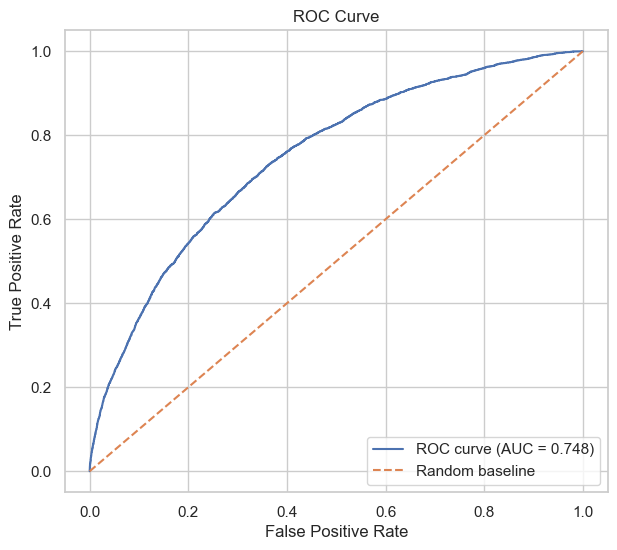

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random baseline")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [35]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, classification_report, confusion_matrix,
    f1_score, precision_score, recall_score
)

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline  # <<< IMPORTANT
from sklearn.pipeline import Pipeline  # for the usual LR (no sampler)

# -------------------------
# 0) Prepare X/y
# -------------------------
target = "Default"
id_col = "loan_id"

X = df.drop(columns=[target])
y = df[target].astype(int)

# -------------------------
# 1) Split: Train / Valid / Test (60/20/20)
# -------------------------
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# -------------------------
# 2) Preprocess
# -------------------------
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
num_cols = [c for c in X_train.columns if c not in cat_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
        ("num", "passthrough", num_cols),
    ]
)

# -------------------------
# 3) Model A: LR with RandomUnderSampler
# -------------------------
lr_under = ImbPipeline(steps=[
    ("prep", preprocess),
    ("under", RandomUnderSampler(random_state=42)),
    ("clf", LogisticRegression(max_iter=2000, solver="lbfgs"))
])

# -------------------------
# 4) Model B: usual LR (optionally class_weight="balanced")
# -------------------------
lr_usual = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=2000, solver="lbfgs", class_weight="balanced"))
    # or: LogisticRegression(max_iter=2000, solver="lbfgs", class_weight="balanced")
])

# Fit
lr_under.fit(X_train, y_train)
lr_usual.fit(X_train, y_train)

# -------------------------
# 5) Helpers
# -------------------------
def evaluate(y_true, proba, thr=0.5, name="model"):
    pred = (proba >= thr).astype(int)

    print(f"\n===== {name} @ thr={thr:.3f} =====")
    print("ROC-AUC:", roc_auc_score(y_true, proba))
    print("Confusion matrix:\n", confusion_matrix(y_true, pred))
    print(classification_report(y_true, pred, digits=3, zero_division=0))

    return {
        "f1_macro": f1_score(y_true, pred, average="macro"),
        "f1_class1": f1_score(y_true, pred, pos_label=1),
        "f1_class0": f1_score(y_true, pred, pos_label=0),
        "precision_1": precision_score(y_true, pred, pos_label=1, zero_division=0),
        "recall_1": recall_score(y_true, pred, pos_label=1, zero_division=0),
        "precision_0": precision_score(y_true, pred, pos_label=0, zero_division=0),
        "recall_0": recall_score(y_true, pred, pos_label=0, zero_division=0),
    }

def tune_weight_threshold(y_true, p_under, p_usual,
                          objective="f1_macro",
                          w_grid=np.linspace(0, 1, 41),
                          thr_grid=np.linspace(0.05, 0.95, 181)):
    best = {"score": -1, "w": None, "thr": None}

    for w in w_grid:
        p_ens = w * p_under + (1 - w) * p_usual

        for thr in thr_grid:
            pred = (p_ens >= thr).astype(int)

            if objective == "f1_macro":
                score = f1_score(y_true, pred, average="macro")
            elif objective == "balanced_f1":  # mean(F1_class0, F1_class1)
                score = 0.5 * (f1_score(y_true, pred, pos_label=0) +
                               f1_score(y_true, pred, pos_label=1))
            else:
                raise ValueError("objective must be 'f1_macro' or 'balanced_f1'")

            if score > best["score"]:
                best.update({"score": score, "w": float(w), "thr": float(thr)})

    return best

# -------------------------
# 6) Probabilities on VALID
# -------------------------
p_under_valid = lr_under.predict_proba(X_valid)[:, 1]
p_usual_valid = lr_usual.predict_proba(X_valid)[:, 1]

# Baseline evaluation @ 0.5
evaluate(y_valid, p_under_valid, 0.5, "LR undersampled")
evaluate(y_valid, p_usual_valid, 0.5, "LR usual")

# -------------------------
# 7) Tune ensemble (weight + threshold) on VALID
# -------------------------
best = tune_weight_threshold(
    y_valid, p_under_valid, p_usual_valid,
    objective="f1_macro"   # or "balanced_f1"
)

print("\nBest ensemble params on VALID:", best)

p_ens_valid = best["w"] * p_under_valid + (1 - best["w"]) * p_usual_valid
evaluate(y_valid, p_ens_valid, best["thr"], "Ensemble (tuned on VALID)")

# -------------------------
# 8) Final evaluation on TEST
# -------------------------
p_under_test = lr_under.predict_proba(X_test)[:, 1]
p_usual_test = lr_usual.predict_proba(X_test)[:, 1]
p_ens_test = best["w"] * p_under_test + (1 - best["w"]) * p_usual_test

evaluate(y_test, p_ens_test, best["thr"], "FINAL Ensemble on TEST")

# -------------------------
# 9) (Optional) save validation.csv (loan_id + PD)
# -------------------------
if id_col in X_valid.columns:
    validation_out = pd.DataFrame({"loan_id": X_valid[id_col].values, "PD": p_ens_valid})
else:
    validation_out = pd.DataFrame({"loan_id": np.arange(len(X_valid)), "PD": p_ens_valid})

validation_out.to_csv("validation.csv", index=False)
print("\nSaved validation.csv")


C:\Users\Aruan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Aruan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


===== LR undersampled @ thr=0.500 =====
ROC-AUC: 0.7312174086856145
Confusion matrix:
 [[23886 11475]
 [ 1556  3083]]
              precision    recall  f1-score   support

           0      0.939     0.675     0.786     35361
           1      0.212     0.665     0.321      4639

    accuracy                          0.674     40000
   macro avg      0.575     0.670     0.553     40000
weighted avg      0.855     0.674     0.732     40000


===== LR usual @ thr=0.500 =====
ROC-AUC: 0.7439819849927894
Confusion matrix:
 [[24101 11260]
 [ 1502  3137]]
              precision    recall  f1-score   support

           0      0.941     0.682     0.791     35361
           1      0.218     0.676     0.330      4639

    accuracy                          0.681     40000
   macro avg      0.580     0.679     0.560     40000
weighted avg      0.857     0.681     0.737     40000


Best ensemble params on VALID: {'score': 0.6243274982456332, 'w': 0.0, 'thr': 0.6549999999999999}

===== Ensemble 

In [36]:
import numpy as np
from sklearn.metrics import f1_score

def fbeta_score_binary(y_true, y_pred, beta=1.0):
    # beta>1 => больше вес recall, beta<1 => больше вес precision
    tp = ((y_true==1) & (y_pred==1)).sum()
    fp = ((y_true==0) & (y_pred==1)).sum()
    fn = ((y_true==1) & (y_pred==0)).sum()
    precision = tp/(tp+fp+1e-12)
    recall = tp/(tp+fn+1e-12)
    beta2 = beta**2
    return (1+beta2)*precision*recall/(beta2*precision+recall+1e-12)

def tune_for_positive_class(y_true, p_under, p_usual, beta=1.0):
    best = {"score":-1, "w":None, "thr":None}
    for w in np.linspace(0,1,41):
        p = w*p_under + (1-w)*p_usual
        for thr in np.linspace(0.01,0.99,199):
            pred = (p>=thr).astype(int)
            score = fbeta_score_binary(y_true, pred, beta=beta)  # beta=1 => F1, beta=2 => F2
            if score > best["score"]:
                best = {"score":score, "w":float(w), "thr":float(thr)}
    return best

best_f1 = tune_for_positive_class(y_valid, p_under_valid, p_usual_valid, beta=1.0)
best_f2 = tune_for_positive_class(y_valid, p_under_valid, p_usual_valid, beta=2.0)

print("Best for F1(class1):", best_f1)
print("Best for F2(class1):", best_f2)


Best for F1(class1): {'score': np.float64(0.3558905196346003), 'w': 0.025, 'thr': 0.6138383838383838}
Best for F2(class1): {'score': np.float64(0.4806450687247598), 'w': 0.1, 'thr': 0.4703030303030303}


In [38]:
from sklearn.metrics import precision_recall_curve

def threshold_with_min_recall(y_true, p, min_recall=0.6):
    prec, rec, thr = precision_recall_curve(y_true, p)
    # thr короче на 1, поэтому аккуратно:
    thr = np.r_[thr, 1.0]
    mask = rec >= min_recall
    if not mask.any():
        return None
    idx = np.argmax(prec[mask])
    return thr[mask][idx], prec[mask][idx], rec[mask][idx]

thr, p_at, r_at = threshold_with_min_recall(y_valid, p_ens_valid, min_recall=0.5)
print(thr, p_at, r_at)


0.6043771270202984 0.27484895154602534 0.5001077818495365


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Собираем validation dataframe
valid_df = X_valid.copy()
valid_df["Default"] = y_valid.values
valid_df["PD"] = p_ens_valid

thresholds = np.linspace(0.05, 0.9, 40)

rows = []

for thr in thresholds:
    flagged = valid_df[valid_df["PD"] >= thr]
    true_defaults = flagged[flagged["Default"] == 1]

    if len(true_defaults) == 0:
        avg_loss = 0
    else:
        avg_loss = true_defaults["LoanAmount"].mean()

    rows.append({
        "threshold": thr,
        "avg_loss_per_default": avg_loss,
        "n_flagged": len(flagged),
        "n_true_defaults": len(true_defaults)
    })

loss_df = pd.DataFrame(rows)
loss_df.head()


,threshold,avg_loss_per_default,n_flagged,n_true_defaults
0,0.050000,146032.813282,39960,4638
1,0.071795,146076.352104,39730,4635
2,0.093590,146200.571645,39339,4627
3,0.115385,146272.851114,38661,4621
4,0.137179,146480.061482,37739,4603


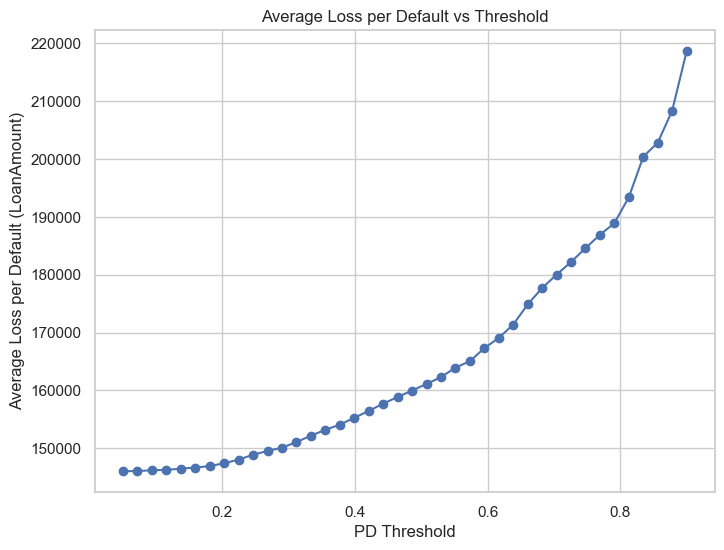

In [40]:
plt.figure(figsize=(8,6))
plt.plot(
    loss_df["threshold"],
    loss_df["avg_loss_per_default"],
    marker="o"
)

plt.xlabel("PD Threshold")
plt.ylabel("Average Loss per Default (LoanAmount)")
plt.title("Average Loss per Default vs Threshold")
plt.grid(True)
plt.show()
